In [1]:
#!pip install kss
#!pip install kerastuner

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

%matplotlib inline

import os
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import string
import re

from konlpy.tag import Okt
# from konlpy.tag import Mecab 

#pip install kss
from kss import split_sentences   
#from pykospacing import spacing

from gensim.models import Word2Vec

# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# from tensorflow.keras.layers import Embedding, Dense,GRU,Flatten, LSTM,Conv1D, GlobalMaxPooling1D, Embedding, Dropout, GlobalAveragePooling1D

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.models import load_model
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.optimizers import Adam

# from kerastuner.tuners import RandomSearch # 랜덤서치를 합니다

from gensim .models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc
from tqdm import tqdm

### Ward clustering 군집 덴드로그램 

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score

In [4]:
# 실루엣 계수 뽑는 함수
data = pd.read_pickle('data_벡터화(토큰).pkl')
num_cluster = 9
def visualize_silhouette_layer1(data, num_cluster):
    clusters_range = range(2,int(num_cluster))
    results = []

    for i in clusters_range:
        clusterer = AgglomerativeClustering(n_clusters=i,linkage='ward')
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_ac = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    return result, pivot_ac

In [5]:
df = data[["token", "review_vec"]]
df = df.dropna()
df

,token,review_vec
0,"[드라마, 설강화, 배우, 김혜윤, 배우, 김혜윤]","[-0.03705043, 0.0030446704, 0.10498903, 0.0117..."
1,"[인스타, 트위터, 댓글, 프루덴셜, 센터]","[-0.01738648, 0.0005801313, 0.021741647, 0.009..."
2,"[사진, 모음, 사진, 모음, 사진, 모음, 사진, 모음]","[0.0061358213, 0.053706825, 0.059647392, 0.033..."
3,[게시판],"[-0.04382301, 0.020393278, 0.06901242, 0.05213..."
4,"[스토리, 포에버, 팔로워, 팔로잉, 게시, 물]","[-0.042341266, 0.04884327, 0.059883893, 0.0100..."
...,...,...
7084,"[폴로, 셔츠, 포니, 가방, 얼룩, 완성, 걸스, 픽, 폴로, 셔츠, 포니, 가방...","[-0.71085846, 0.079961635, 0.8093155, -0.54867..."
7085,"[스타, 일링, 셀럽, 폴로, 랄프, 로렌, 셔츠, 스타, 일링, 기은세, 꾸리, ...","[-0.3739973, 0.17031088, -0.02671735, -0.53713..."
7086,"[게시판, 정수정, 근황, 좋다, 광고, 실, 행사, 배우, 정수정, 님근황, 해바...","[-0.4879199, 0.2553368, 0.3971704, -0.03815675..."
7087,"[스타, 패션, 정수정, 스트라이프, 럭비, 티셔츠, 폴로, 랄프, 로렌, 안녕하다...","[-0.21006502, 0.2101962, 0.21272005, 0.1941829..."


In [6]:
df["review vector"] = np.array(df["review_vec"],dtype=object)
print(df["review vector"])

0       [-0.03705043, 0.0030446704, 0.10498903, 0.0117...
1       [-0.01738648, 0.0005801313, 0.021741647, 0.009...
2       [0.0061358213, 0.053706825, 0.059647392, 0.033...
3       [-0.04382301, 0.020393278, 0.06901242, 0.05213...
4       [-0.042341266, 0.04884327, 0.059883893, 0.0100...
                              ...                        
7084    [-0.71085846, 0.079961635, 0.8093155, -0.54867...
7085    [-0.3739973, 0.17031088, -0.02671735, -0.53713...
7086    [-0.4879199, 0.2553368, 0.3971704, -0.03815675...
7087    [-0.21006502, 0.2101962, 0.21272005, 0.1941829...
7088    [-0.7911025, 0.05248901, 0.5756356, 0.87237746...
Name: review vector, Length: 7089, dtype: object


In [7]:
rv = []
ul = []
for a, i in enumerate(df["review_vec"]):
    if type(i) != int:
        rv.append(i)
    else:
        ul.append(a)
print(len(rv))
print(len(ul))
ul

7089
0


[]

In [8]:
for i in ul:
    df = df.drop(df.index[i])
df = df.reset_index(drop = True)
df

,token,review_vec,review vector
0,"[드라마, 설강화, 배우, 김혜윤, 배우, 김혜윤]","[-0.03705043, 0.0030446704, 0.10498903, 0.0117...","[-0.03705043, 0.0030446704, 0.10498903, 0.0117..."
1,"[인스타, 트위터, 댓글, 프루덴셜, 센터]","[-0.01738648, 0.0005801313, 0.021741647, 0.009...","[-0.01738648, 0.0005801313, 0.021741647, 0.009..."
2,"[사진, 모음, 사진, 모음, 사진, 모음, 사진, 모음]","[0.0061358213, 0.053706825, 0.059647392, 0.033...","[0.0061358213, 0.053706825, 0.059647392, 0.033..."
3,[게시판],"[-0.04382301, 0.020393278, 0.06901242, 0.05213...","[-0.04382301, 0.020393278, 0.06901242, 0.05213..."
4,"[스토리, 포에버, 팔로워, 팔로잉, 게시, 물]","[-0.042341266, 0.04884327, 0.059883893, 0.0100...","[-0.042341266, 0.04884327, 0.059883893, 0.0100..."
...,...,...,...
7084,"[폴로, 셔츠, 포니, 가방, 얼룩, 완성, 걸스, 픽, 폴로, 셔츠, 포니, 가방...","[-0.71085846, 0.079961635, 0.8093155, -0.54867...","[-0.71085846, 0.079961635, 0.8093155, -0.54867..."
7085,"[스타, 일링, 셀럽, 폴로, 랄프, 로렌, 셔츠, 스타, 일링, 기은세, 꾸리, ...","[-0.3739973, 0.17031088, -0.02671735, -0.53713...","[-0.3739973, 0.17031088, -0.02671735, -0.53713..."
7086,"[게시판, 정수정, 근황, 좋다, 광고, 실, 행사, 배우, 정수정, 님근황, 해바...","[-0.4879199, 0.2553368, 0.3971704, -0.03815675...","[-0.4879199, 0.2553368, 0.3971704, -0.03815675..."
7087,"[스타, 패션, 정수정, 스트라이프, 럭비, 티셔츠, 폴로, 랄프, 로렌, 안녕하다...","[-0.21006502, 0.2101962, 0.21272005, 0.1941829...","[-0.21006502, 0.2101962, 0.21272005, 0.1941829..."


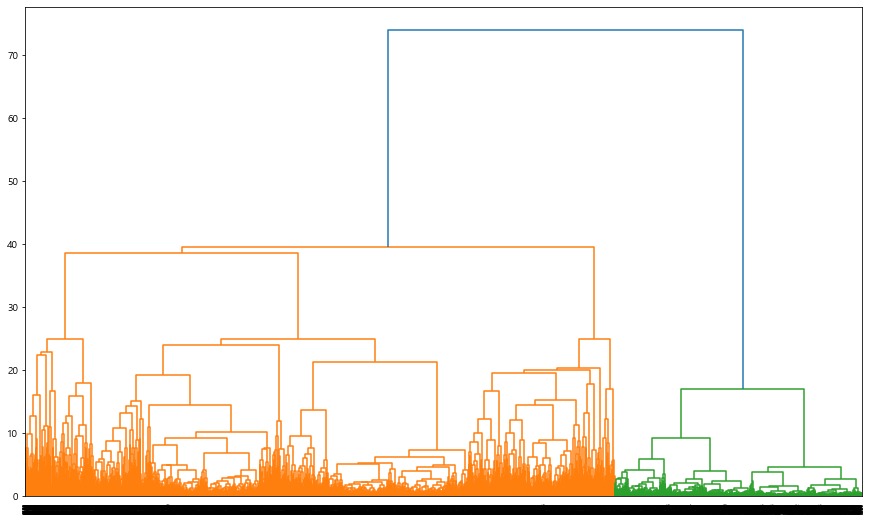

In [9]:
linked = linkage(rv, 'ward')

plt.figure(figsize=(15, 9))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.savefig('덴드로그램.png', bbox_inches='tight')            
plt.show()

### 실루엣 계수 조정

In [10]:
df

,token,review_vec,review vector
0,"[드라마, 설강화, 배우, 김혜윤, 배우, 김혜윤]","[-0.03705043, 0.0030446704, 0.10498903, 0.0117...","[-0.03705043, 0.0030446704, 0.10498903, 0.0117..."
1,"[인스타, 트위터, 댓글, 프루덴셜, 센터]","[-0.01738648, 0.0005801313, 0.021741647, 0.009...","[-0.01738648, 0.0005801313, 0.021741647, 0.009..."
2,"[사진, 모음, 사진, 모음, 사진, 모음, 사진, 모음]","[0.0061358213, 0.053706825, 0.059647392, 0.033...","[0.0061358213, 0.053706825, 0.059647392, 0.033..."
3,[게시판],"[-0.04382301, 0.020393278, 0.06901242, 0.05213...","[-0.04382301, 0.020393278, 0.06901242, 0.05213..."
4,"[스토리, 포에버, 팔로워, 팔로잉, 게시, 물]","[-0.042341266, 0.04884327, 0.059883893, 0.0100...","[-0.042341266, 0.04884327, 0.059883893, 0.0100..."
...,...,...,...
7084,"[폴로, 셔츠, 포니, 가방, 얼룩, 완성, 걸스, 픽, 폴로, 셔츠, 포니, 가방...","[-0.71085846, 0.079961635, 0.8093155, -0.54867...","[-0.71085846, 0.079961635, 0.8093155, -0.54867..."
7085,"[스타, 일링, 셀럽, 폴로, 랄프, 로렌, 셔츠, 스타, 일링, 기은세, 꾸리, ...","[-0.3739973, 0.17031088, -0.02671735, -0.53713...","[-0.3739973, 0.17031088, -0.02671735, -0.53713..."
7086,"[게시판, 정수정, 근황, 좋다, 광고, 실, 행사, 배우, 정수정, 님근황, 해바...","[-0.4879199, 0.2553368, 0.3971704, -0.03815675...","[-0.4879199, 0.2553368, 0.3971704, -0.03815675..."
7087,"[스타, 패션, 정수정, 스트라이프, 럭비, 티셔츠, 폴로, 랄프, 로렌, 안녕하다...","[-0.21006502, 0.2101962, 0.21272005, 0.1941829...","[-0.21006502, 0.2101962, 0.21272005, 0.1941829..."


In [11]:
model = AgglomerativeClustering(n_clusters=5,linkage='ward')
label = model.fit_predict(rv)
df["cluster"] = label

In [12]:
df['cluster'].value_counts()

0    3183
3    2092
2    1241
1     292
4     281
Name: cluster, dtype: int64

In [13]:
df

,token,review_vec,review vector,cluster
0,"[드라마, 설강화, 배우, 김혜윤, 배우, 김혜윤]","[-0.03705043, 0.0030446704, 0.10498903, 0.0117...","[-0.03705043, 0.0030446704, 0.10498903, 0.0117...",3
1,"[인스타, 트위터, 댓글, 프루덴셜, 센터]","[-0.01738648, 0.0005801313, 0.021741647, 0.009...","[-0.01738648, 0.0005801313, 0.021741647, 0.009...",3
2,"[사진, 모음, 사진, 모음, 사진, 모음, 사진, 모음]","[0.0061358213, 0.053706825, 0.059647392, 0.033...","[0.0061358213, 0.053706825, 0.059647392, 0.033...",3
3,[게시판],"[-0.04382301, 0.020393278, 0.06901242, 0.05213...","[-0.04382301, 0.020393278, 0.06901242, 0.05213...",3
4,"[스토리, 포에버, 팔로워, 팔로잉, 게시, 물]","[-0.042341266, 0.04884327, 0.059883893, 0.0100...","[-0.042341266, 0.04884327, 0.059883893, 0.0100...",3
...,...,...,...,...
7084,"[폴로, 셔츠, 포니, 가방, 얼룩, 완성, 걸스, 픽, 폴로, 셔츠, 포니, 가방...","[-0.71085846, 0.079961635, 0.8093155, -0.54867...","[-0.71085846, 0.079961635, 0.8093155, -0.54867...",2
7085,"[스타, 일링, 셀럽, 폴로, 랄프, 로렌, 셔츠, 스타, 일링, 기은세, 꾸리, ...","[-0.3739973, 0.17031088, -0.02671735, -0.53713...","[-0.3739973, 0.17031088, -0.02671735, -0.53713...",2
7086,"[게시판, 정수정, 근황, 좋다, 광고, 실, 행사, 배우, 정수정, 님근황, 해바...","[-0.4879199, 0.2553368, 0.3971704, -0.03815675...","[-0.4879199, 0.2553368, 0.3971704, -0.03815675...",3
7087,"[스타, 패션, 정수정, 스트라이프, 럭비, 티셔츠, 폴로, 랄프, 로렌, 안녕하다...","[-0.21006502, 0.2101962, 0.21272005, 0.1941829...","[-0.21006502, 0.2101962, 0.21272005, 0.1941829...",0


In [14]:
df.to_pickle("LDA전.pkl")
df.to_csv("LDA전.csv", encoding='utf-8-sig')